In [1]:
import numpy as np

### Create polynomial feature extension in case non-linear model should be created

In [12]:
def polynomial_feature_extension(X, degree):
  '''
  X (n by 1 array): x- 1d feature vector
  degree (int): degree of polynomial, for example if degree = 2, then the basis is (1, x, x^2)

  returns X_extended: feature-extended array of size (degree + 1) by n
  '''
  X_extended = np.ones(shape = (degree + 1,len(X)))

  for n in range(degree + 1):
    X_extended[:, n] = X.squeeze()**n # populate n-th column of X_extended with n-th power of X

  return X_extended

In [13]:
# Check if polynomial feature extension works
X = np.array([[1], [2.5], [8]])
print(X.squeeze()**2)

print(polynomial_feature_extension(X, 2))

[ 1.    6.25 64.  ]
[[ 1.    1.    1.  ]
 [ 1.    2.5   6.25]
 [ 1.    8.   64.  ]]


### Coding SGD algorithm

In [27]:
def SGD(X, y, weights, bias, lr = 0.01,  ridge = True, l = 0.1):
  '''
  X (n by d array): feature matrix
  y (n by 1 array): target column
  weights (d by 1 array): vector of weights, weights[0] is the bias term, d is the dimension of feature space
  bias (float): bias term in linear regression model
  lr (float): learning rate of stochastic gradient descent
  ridge (bool): if True, the regulatrization term lambda * ||weights||^2 is added to the loss function
  l (float): regularization parameter

  returns: updated set of weights after one step of (full) gradient descent
  '''
  # compute the gradient
  r = 1 if ridge else 0
  gradient_weights = (2/X.shape[0]) * np.dot(X.T, np.dot(X, weights) - y)  + 2 * l * weights * r
  gradient_bias = (2/X.shape[0]) * np.sum(np.dot(X, weights) - y)

  return weights - lr*gradient_weights, bias - lr*gradient_bias



### Linear regression with regularization and SGD

In [55]:
def linear_regression(X, y, lr = 0.01, epochs = 1000,  ridge = True, l = 0.1):
  '''
  X (d by n array): feature matrix
  y (n by 1 array): target column
  weights (d by 1 array): vector of weights, weights[0] is the bias term, d is the dimension of feature space
  bias (float): bias term in linear regression model
  lr (float): learning rate of stochastic gradient descent
  epochs (int): number of iterations of SGD
  ridge (bool): if True, the regulatrization term lambda * ||weights||^2 is added to the loss function
  l (float): regularization parameter

  returns: best set of weights and bias
  '''
  weights = np.random.normal(size = (X.shape[1],1))
  bias = np.random.normal()

  for i in range(epochs):
    weights, bias = SGD(X, y, weights, bias, lr = lr,  ridge = ridge, l = l)

  return weights, bias




### Create and plot test set

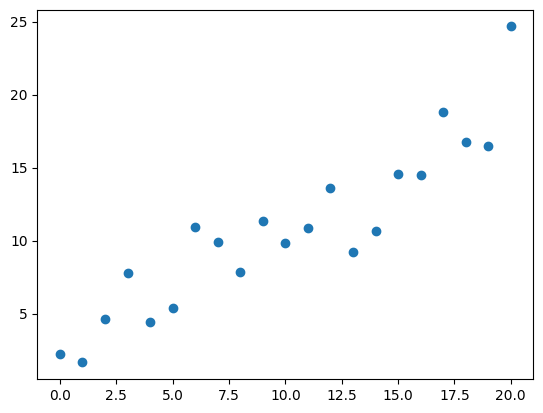

In [40]:
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.expand_dims(np.arange(0, 21), axis = 1)
y = X + np.random.normal(loc = 1, scale = 2.5, size = X.shape)

plt.scatter(X, y)
plt.show()

### Fit the line to test set

In [60]:
weights, bias = linear_regression(X, y, ridge = True, lr = 0.0001)

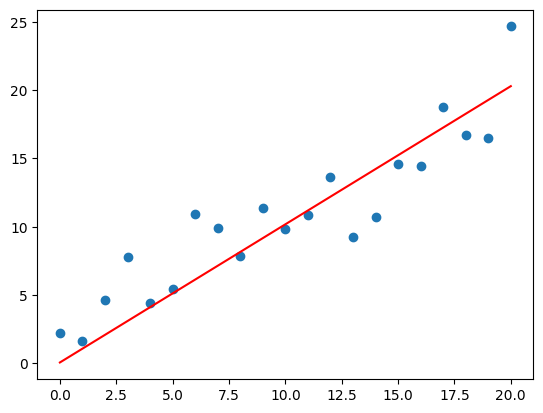

In [61]:
x_new = np.linspace(0, 20, 100)
y_new = x_new*(weights[0][0]) + bias

plt.scatter(X, y)
plt.plot(x_new, y_new, color = 'red')
plt.show()